# ARIMA and Seasonal ARIMA

### Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

#### 1: Visualize the Time Series Data
#### 2: Make the time series data stationary
#### 3: Plot the Correlation and AutoCorrelation Charts
#### 4: Construct the ARIMA Model or Seasonal ARIMA based on the data
#### 5: Use the model to make predictions
    
Let's go through these steps!

In [652]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [653]:
df=pd.read_csv('Electric_Production.csv')

In [654]:
## Cleaning up the data
df.dropna()

,DATE,Power Consumption
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


# Step 1: Visualize the data

In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE                 397 non-null object
Power Consumption    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [656]:
df.head(5)

,DATE,Power Consumption
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [657]:
df.set_index('DATE',inplace=True)

In [658]:
df.index=pd.to_datetime(df.index)

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
Power Consumption    397 non-null float64
dtypes: float64(1)
memory usage: 6.2 KB


In [660]:
df.head()

,Power Consumption
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Text(0, 0.5, 'Power Consumption')

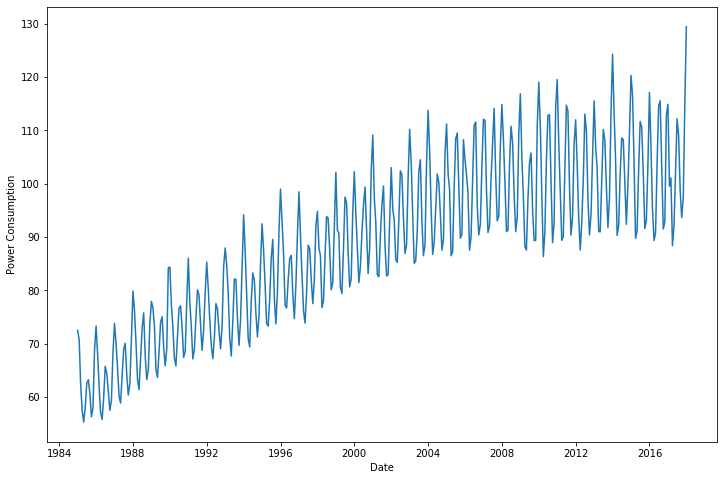

In [661]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Power Consumption')

##### We found graph upward trending over time with seasonality
##### As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
##### Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [662]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()

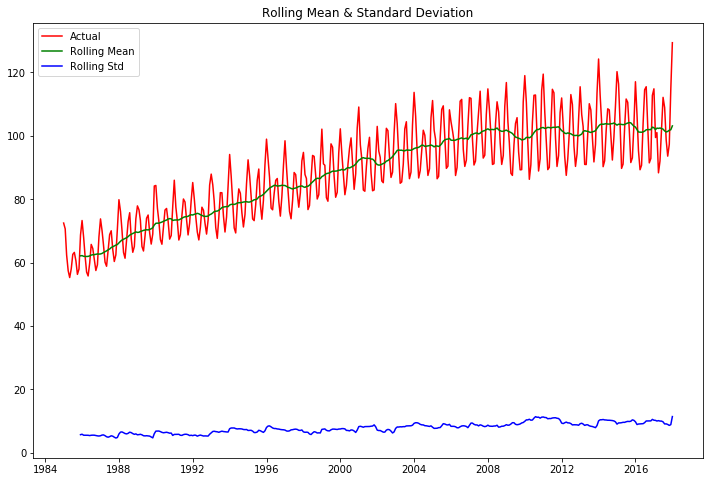

In [663]:
plt.figure(figsize=(12,8))
actual=plt.plot(df,color='red',label='Actual')
rolm=plt.plot(rolmean,color='green',label='Rolling Mean')
rols=plt.plot(rolstd,color='blue',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

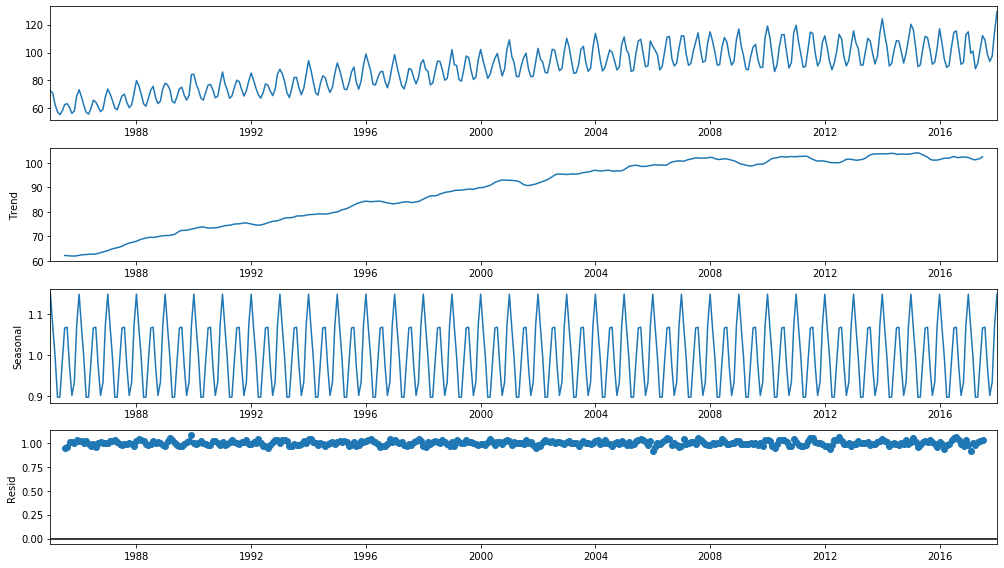

In [664]:
from pylab import rcParams
rcParams['figure.figsize']=(14,8)
df_mul_decompose=seasonal_decompose(df,model='multiplicative')
df_mul_decompose.plot()
plt.show()

### Check for stationarity

In [665]:
from statsmodels.tsa.stattools import adfuller

In [666]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Consumption):
    rolmean=Consumption.rolling(window=12).mean()
    rolstd=Consumption.rolling(window=12).std()
    
    #Rolling statistics test
    plt.figure(figsize=(12,8))
    actual=plt.plot(Consumption,color='red',label='Actual')
    rolm=plt.plot(rolmean,color='black',label='Rolling Mean')
    rols=plt.plot(rolstd,color='blue',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    result=adfuller(Consumption)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

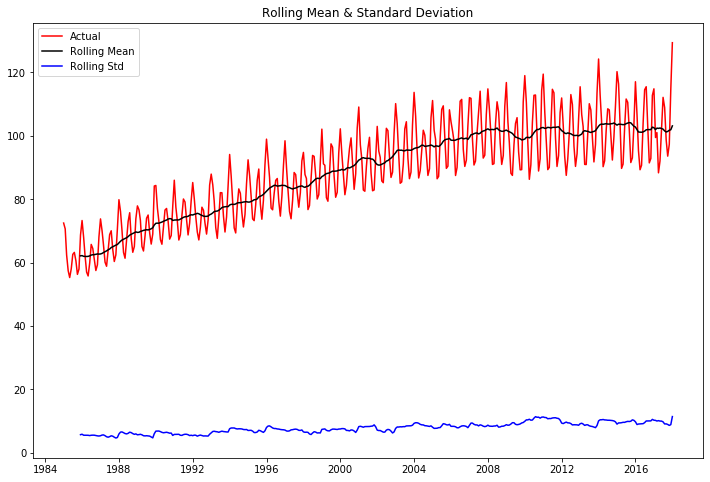

ADF Test Statistic : -2.2569903500472503
p-value : 0.1862146911658658
#Lags Used : 15
Number of Observations Used : 381
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [667]:
adfuller_test(df['Power Consumption'])

# Step 2: Make the time series data stationary

In [668]:
from pmdarima.arima.utils import ndiffs
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

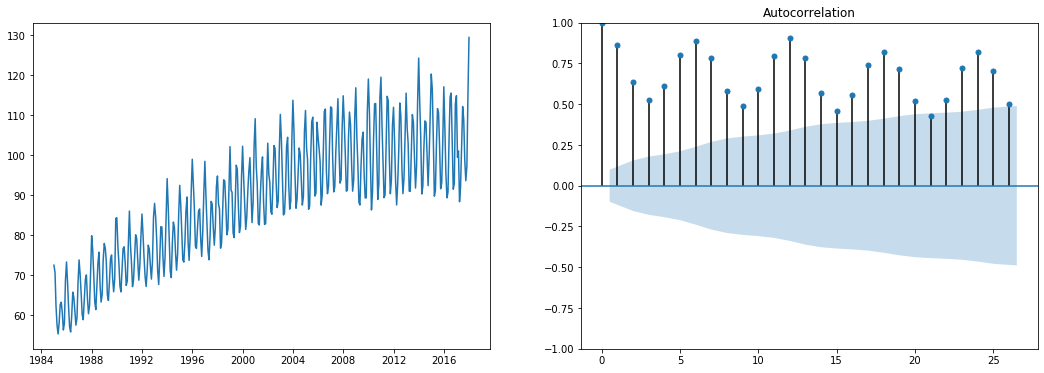

In [669]:
diff=df['Power Consumption'].dropna().to_frame()
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(18,6))
ax1.plot(diff)
plot_acf(diff,ax=ax2);
# It is not randomly distributed around mean of 0

In [670]:
df['Seasonal First Difference']=df['Power Consumption']-df['Power Consumption'].shift(12) #d=1

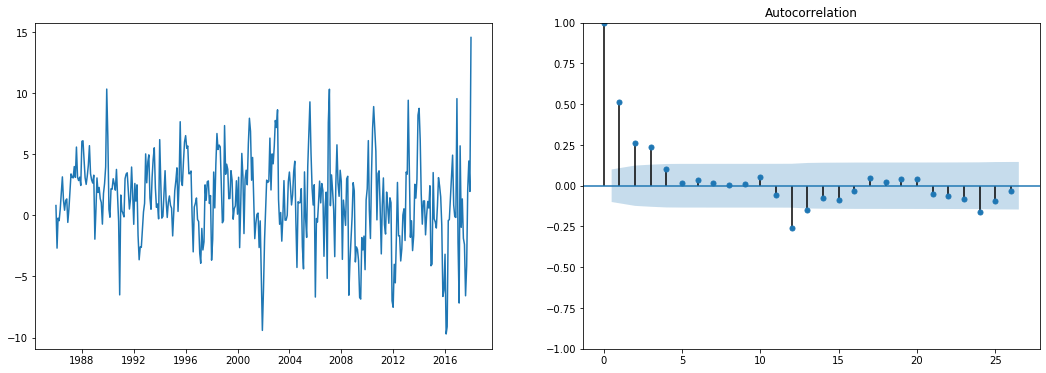

In [671]:
diff=df['Seasonal First Difference'].dropna().to_frame()
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(18,6))
ax1.plot(diff)
plot_acf(diff,ax=ax2);
# It is now randomly distributed around mean of 0, by differencing or shifting 1 times so d=1

In [672]:
df.head(14)

,Power Consumption,Seasonal First Difference
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,NaN
1985-03-01,62.4502,NaN
1985-04-01,57.4714,NaN
1985-05-01,55.3151,NaN
1985-06-01,58.0904,NaN
1985-07-01,62.6202,NaN
1985-08-01,63.2485,NaN
1985-09-01,60.5846,NaN


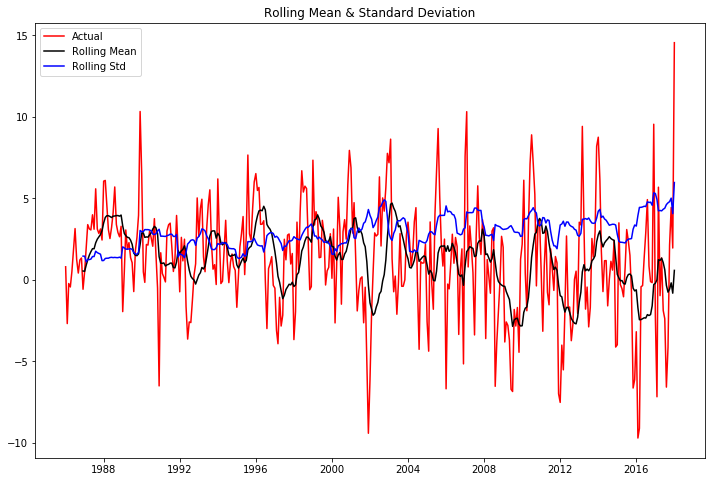

ADF Test Statistic : -5.673482023381763
p-value : 8.812644938088861e-07
#Lags Used : 12
Number of Observations Used : 372
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [673]:
adfuller_test(df['Seasonal First Difference'].dropna())

##### we removed the trend from the series and, mean and variance are now stationary

# Step 3: Plot the Correlation and AutoCorrelation Charts

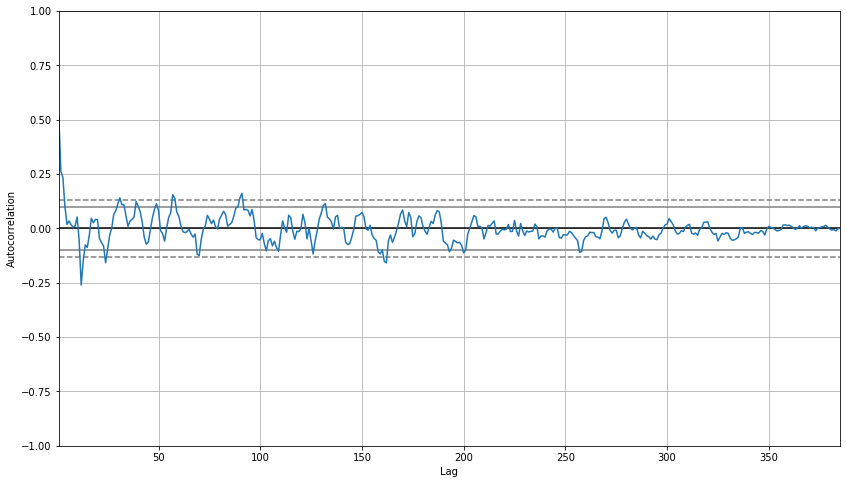

In [674]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())
plt.show()

In [675]:
import statsmodels.api as sm

### Final Thoughts on Autocorrelation and Partial Autocorrelation

#### Identification of an AR model is often best done with the PACF.
If the data are from an ARIMA( p, d,0) or ARIMA(0, d,q) model, then the ACF and PACF plots can be helpful in determining the value of p or q. If p and q are both positive, then the plots do not help in finding suitable values of p and q.

### The data may follow an ARIMA( p,d,0) model if the ACF and PACF plots of the differenced data show the following patterns:

###### -the ACF is exponentially decaying or sinusoidal;
###### -there is a significant spike at lag p in the PACF, but none beyond lag p.


       
### The data may follow an ARIMA(0,d,q) model if the ACF and PACF plots of the differenced data show the following patterns:

###### -the PACF is exponentially decaying or sinusoidal;
###### -there is a significant spike at lag q in the ACF, but none beyond lag q.

#### p,d,q p AR model lags d differencing q MA lags



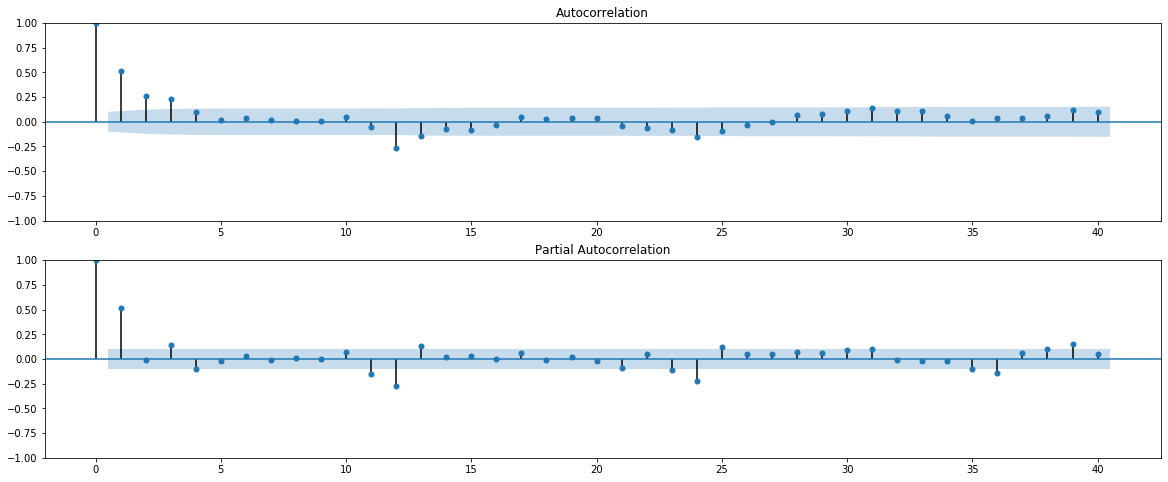

In [676]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

#### As PACF is exponentially decaying or sinusoidal, we can consider q/Q=0 or q/Q=1 and there is a spike at lag=1 in PACF so p=1.

#### As at lag 12 in PACF there is a spike, as when we consider PACF on seasonal basis (in this case every 12 months), so P=1.

# Step 4: Construct the ARIMA Model or Seasonal ARIMA based on the data

In [677]:
from statsmodels.tsa.arima_model import ARIMA

#### we will fit the model till 2010 and we predict values from 2010 to 2018 to measure the accuracy of model

In [678]:
model1=sm.tsa.arima.ARIMA(df.loc[:'2010-01-01','Power Consumption'],order=(1,1,0)) 
model_fit1=model1.fit()

In [679]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Power Consumption   No. Observations:                  301
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -989.108
Date:                Mon, 15 Aug 2022   AIC                           1982.216
Time:                        22:41:32   BIC                           1989.624
Sample:                    01-01-1985   HQIC                          1985.181
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3683      0.069      5.375      0.000       0.234       0.503
sigma2        42.7637      3.814     11.212      0.000      35.288      50.239
===================================================================================
Ljung-Box (L1) (Q):                  16.85   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.00   Prob(JB):                         0.71
Heteroskedasticity (H):               2.63   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

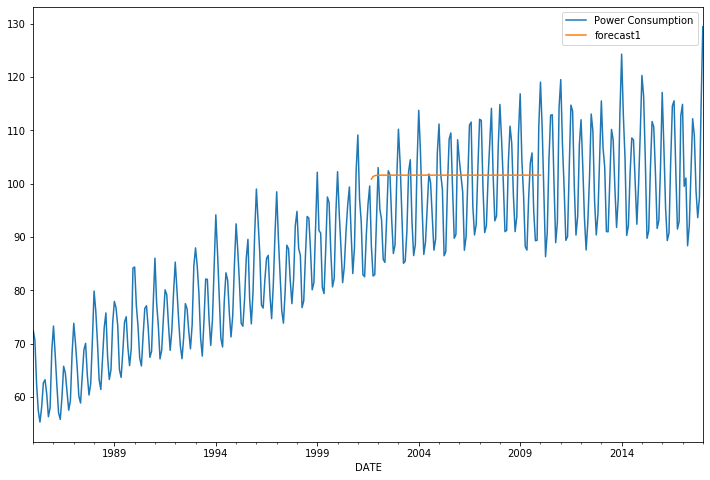

In [680]:
df['forecast1']=model_fit1.predict(start=200,end=300,dynamic=True)
df[['Power Consumption','forecast1']].plot(figsize=(12,8))
# as data is seasonal that is why we are not getting appropriate result

When you set dynamic=True, the model continuously predicts one-step ahead (t+1) and then for the 2nd step ahead (t+2) prediction, it appends predicted value (t+1) to data, re-fits model on new expanded data then makes 2nd step ahead forecast. This is called out-of-sample prediction.

When you set dynamic=False, the model sequentially predicts one-step-ahead using the true value from previous time step instead of using predicted value. This is called in-sample prediction.

Since out-of-sample approach uses the last predicted value from the previous time step to predict the next value in time, as number of steps get farther, it is expected to deviate from actual values because on each step's prediction fitted model learns previous predicted step's errors as well.

#### Now, we use SARIMA Model

In [681]:
# using SARIMA model as data is seasonal
model=sm.tsa.statespace.SARIMAX(df.loc[:'2010-01-01','Power Consumption'],order=(1,1,0),seasonal_order=(1, 1,0,12))
model_fit=model.fit()

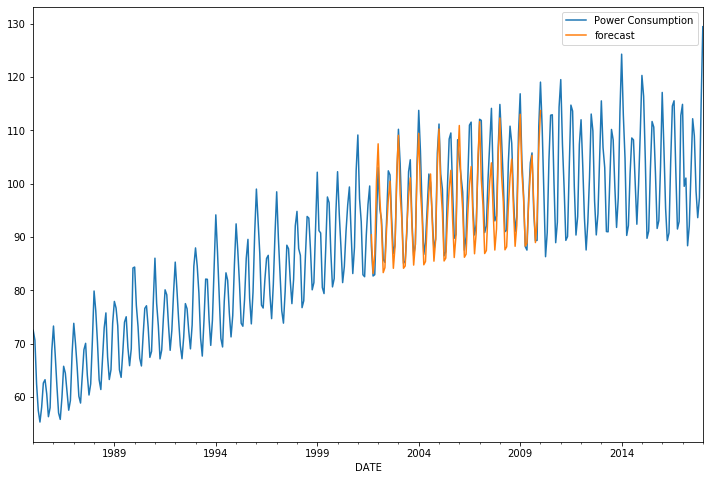

In [682]:
df['forecast']=model_fit.predict(start=200,end=300,dynamic=True)
df[['Power Consumption','forecast']].plot(figsize=(12,8))

#Now we are getting better result as compare to ARIMA

In [683]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Power Consumption   No. Observations:                  301
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -692.716
Date:                            Mon, 15 Aug 2022   AIC                           1391.432
Time:                                    22:41:33   BIC                           1402.420
Sample:                                01-01-1985   HQIC                          1395.835
                                     - 01-01-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2359      0.049     -4.802      0.000      -0.332      -0.140
ar.S.L12      -0.3808      0.044     -8.623      0.000      -0.467      -0.294
sigma2         7.1414      0.467     15.303      0.000       6.227       8.056
===================================================================================
Ljung-Box (L1) (Q):                   1.68   Jarque-Bera (JB):                25.27
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

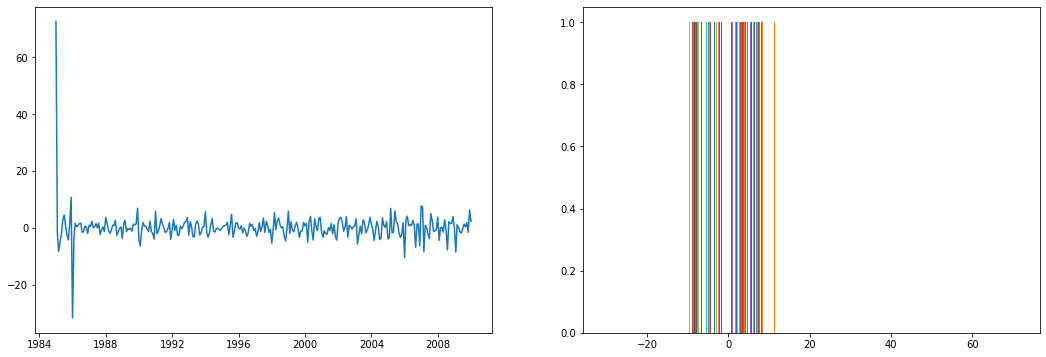

In [684]:
#plot residuals errors
residual=pd.DataFrame(model_fit.resid)
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(18,6))
ax1.plot(residual)
ax2.hist(residual);

#### above plot concludes that residuals does not vary with time or residuals is distributed around mean of 0, so we don't need to consider the residuals further

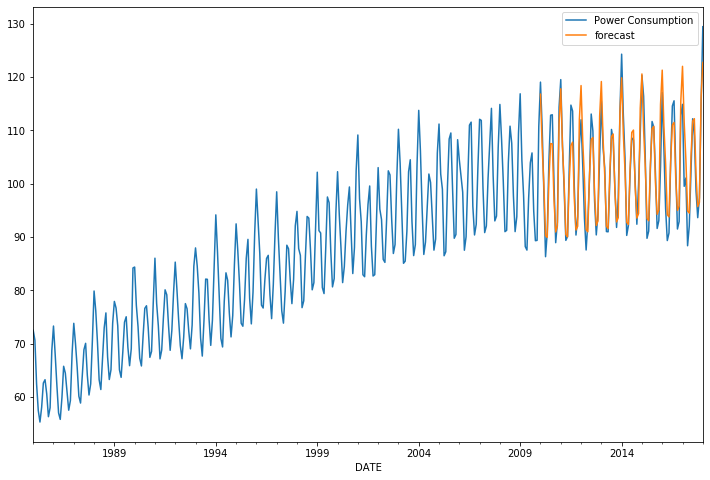

In [685]:
df['forecast']=model_fit.predict(start=300,end=396,dynamic=True)
df[['Power Consumption','forecast']].plot(figsize=(12,8))

In [686]:
df.tail(100)

,Power Consumption,Seasonal First Difference,forecast1,forecast
DATE,,,,
2009-10-01,89.2977,-1.7002,101.58237,NaN
2009-11-01,89.3585,-4.4472,101.58237,NaN
2009-12-01,110.6844,1.2623,101.58237,NaN
2010-01-01,119.0166,2.1850,101.58237,116.752983
2010-02-01,110.5330,6.1128,NaN,106.931952
...,...,...,...,...
2017-09-01,98.6154,-4.1483,NaN,101.580216
2017-10-01,93.6137,2.1270,NaN,95.682529
2017-11-01,97.3359,4.4459,NaN,96.500554


In [687]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [688]:
y_pred=df.loc['2010-02-01':'2018-01-01','forecast']
y_actual=df.loc['2010-02-01':'2018-01-01','Power Consumption']


In [689]:
MAPE(y_actual,y_pred)

2.8506536240425167

# Step 5: Use the model to make predictions

In [690]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [691]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [692]:
future_df=pd.concat([df,future_datest_df])

#### We will now predict the power consumption for the next 34 months 

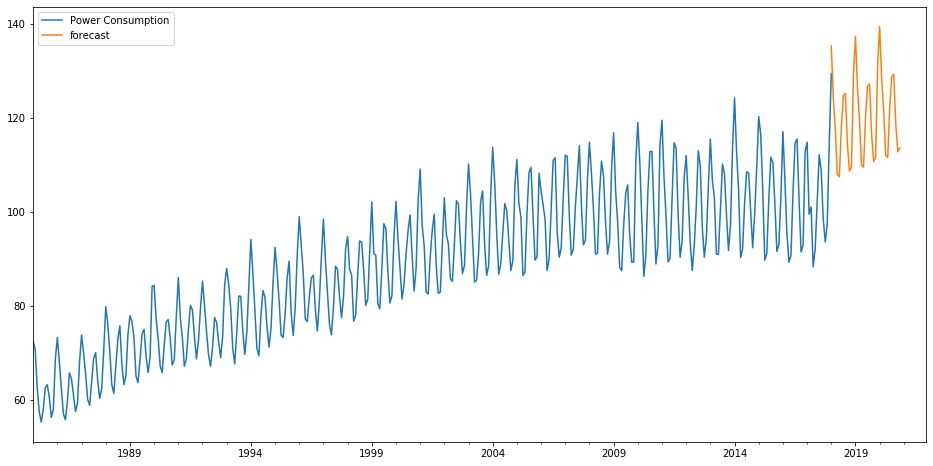

In [693]:
future_df['forecast'] = model_fit.predict(start = 396, end = 430, dynamic= False)  
future_df[['Power Consumption', 'forecast']].plot(figsize=(16,8)) 